# Import Libraries & Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [3]:
path = '/Users/stephenhelvig/Documents/Python Projects/DataCo Analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'dataco_cleaned_3.pkl'))

# Data Cleaning

In [8]:
df.head(20)

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,address_dest,shipping_distance_km,order_year,order_month,order_quarter,order_day_of_week,order_hour,order_month_name,order_day_name,department_corrected
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,"Bekasi, West Java, Indonesia",18479.364780,2018,1,1,2,22,January,Wednesday,Team Sports
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,"Bikaner, Rajasthan, India",13259.724464,2018,1,1,5,12,January,Saturday,Team Sports
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,"Bikaner, Rajasthan, India",12581.292938,2018,1,1,5,12,January,Saturday,Team Sports
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,"Townsville City QLD 4810, Australia",11628.474178,2018,1,1,5,11,January,Saturday,Team Sports
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,"Townsville City QLD 4810, Australia",16559.192778,2018,1,1,5,11,January,Saturday,Team Sports
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,"Toowoomba QLD, Australia",15175.179215,2018,1,1,5,11,January,Saturday,Team Sports
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,"Guangzhou, Guangdong Province, China",15414.146991,2018,1,1,5,10,January,Saturday,Team Sports
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,"Guangzhou, Guangdong Province, China",14371.805455,2018,1,1,5,10,January,Saturday,Team Sports
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,"Guangzhou, Guangdong Province, China",15415.182677,2018,1,1,5,10,January,Saturday,Team Sports
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,"Guangzhou, Guangdong Province, China",11121.234271,2018,1,1,5,9,January,Saturday,Team Sports


In [9]:
df.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_email', 'customer_fname', 'customer_id',
       'customer_lname', 'customer_password', 'customer_segment',
       'customer_state', 'customer_street', 'customer_zipcode',
       'department_id', 'department_name', 'latitude_src', 'longitude_src',
       'market', 'order_city', 'order_country', 'order_customer_id',
       'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_image', 'product_name', 'product_price', 'product_

In [10]:
df.shape

(180519, 65)

In [11]:
df.isnull().sum()

type                           0
days_for_shipping_real         0
days_for_shipment_scheduled    0
benefit_per_order              0
sales_per_customer             0
                              ..
order_day_of_week              0
order_hour                     0
order_month_name               0
order_day_name                 0
department_corrected           0
Length: 65, dtype: int64

In [12]:
dups = df.duplicated()

In [13]:
dups.shape

(180519,)

/var/folders/58/c77n0yc97t9c_v_2y266x2s40000gn/T/ipykernel_77051/3782236067.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['order_item_profit_ratio'], bins=25) # Shows extreme values


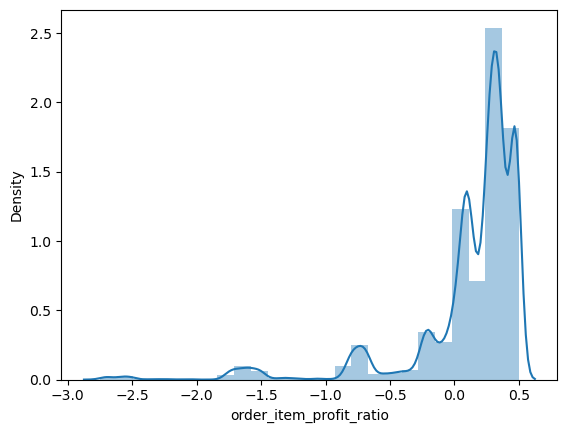

In [14]:
sns.distplot(df['order_item_profit_ratio'], bins=25) # Shows extreme values
plt.show()

In [15]:
df['order_item_profit_ratio'].mean()

np.float64(0.12064663549026416)

In [16]:
df['order_item_profit_ratio'].median()

0.270000011

In [18]:
df['order_item_profit_ratio'].max()

0.5

In [19]:
df['order_item_profit_ratio'].min()

-2.75

# Data prep for regression analysis

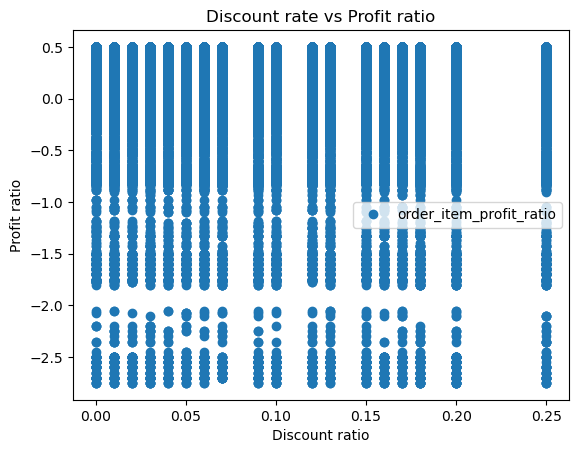

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'order_item_discount_rate', y='order_item_profit_ratio',style='o')
plt.title('Discount rate vs Profit ratio')  
plt.xlabel('Discount ratio')  
plt.ylabel('Profit ratio')  
plt.show()

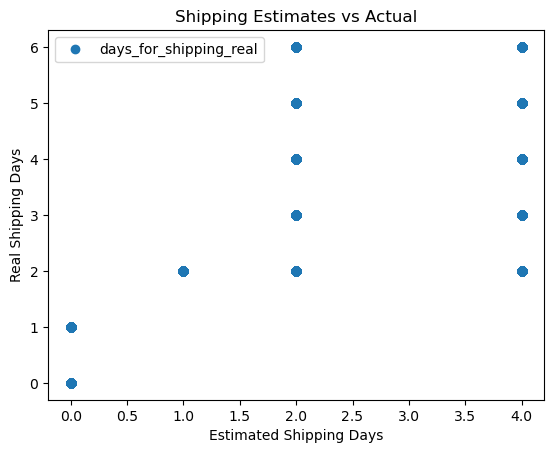

In [22]:
df.plot(x = 'days_for_shipment_scheduled', y='days_for_shipping_real',style='o')
plt.title('Shipping Estimates vs Actual')  
plt.xlabel('Estimated Shipping Days')  
plt.ylabel('Real Shipping Days')  
plt.show()

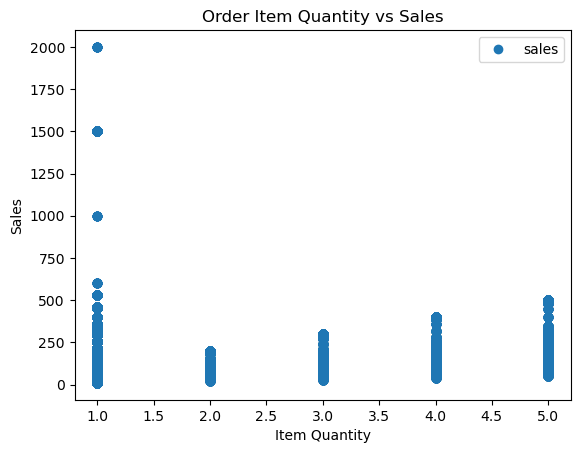

In [23]:
df.plot(x = 'order_item_quantity', y='sales',style='o')
plt.title('Order Item Quantity vs Sales')  
plt.xlabel('Item Quantity')  
plt.ylabel('Sales')  
plt.show()

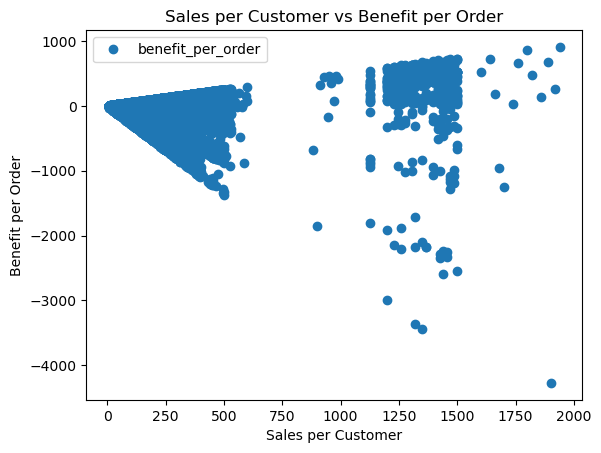

In [24]:
df.plot(x = 'sales_per_customer', y='benefit_per_order',style='o')
plt.title('Sales per Customer vs Benefit per Order')  
plt.xlabel('Sales per Customer')  
plt.ylabel('Benefit per Order')  
plt.show()

# Hypothesis

No linear relationship exists between discount rate and profit ratios in this simulated dataset. 

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['order_item_discount_rate'].values.reshape(-1,1)
y = df['order_item_profit_ratio'].values.reshape(-1,1)

In [26]:
X

array([[0.04],
       [0.05],
       [0.06],
       ...,
       [0.02],
       [0.03],
       [0.04]])

In [28]:
y

array([[ 0.28999999],
       [-0.80000001],
       [-0.80000001],
       ...,
       [ 0.36000001],
       [ 0.47999999],
       [ 0.44      ]])

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [30]:
# Create a regression object.

regression = LinearRegression()

In [31]:
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

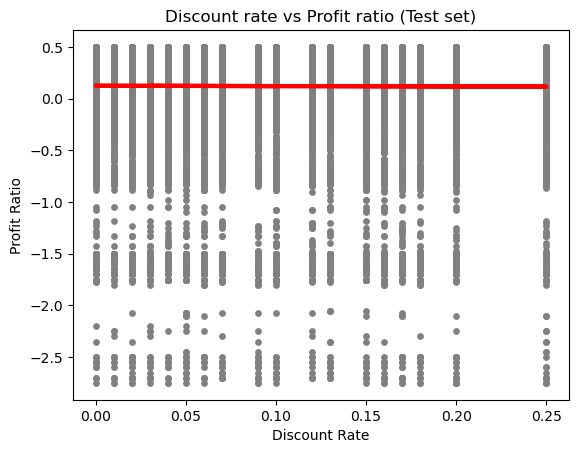

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Discount rate vs Profit ratio (Test set)')
plot_test.xlabel('Discount Rate')
plot_test.ylabel('Profit Ratio')
plot_test.show()

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03218779]]
Mean squared error:  0.2204037773723525
R2 score:  -5.6616390303299013e-05


My hypothesis is correct -> there's no relationship because of the artificial nature of the dataset. I'll try again on another set of variables.

In [36]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['sales_per_customer'].values.reshape(-1,1)
y = df['benefit_per_order'].values.reshape(-1,1)

In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
regression = LinearRegression()

In [39]:
regression.fit(X_train, y_train)

LinearRegression()

In [40]:
y_predicted = regression.predict(X_test)

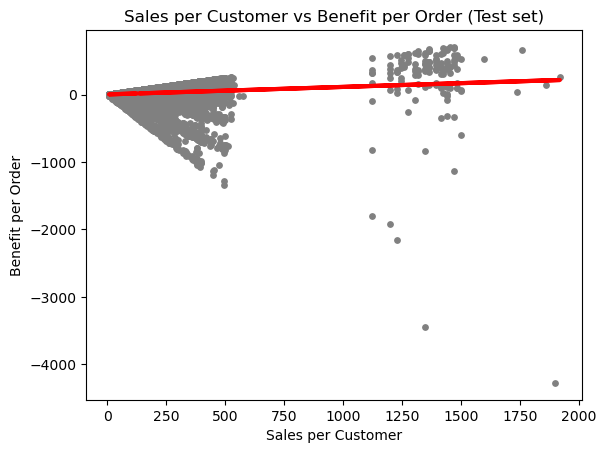

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales per Customer vs Benefit per Order (Test set)')
plot_test.xlabel('Sales per Customer')
plot_test.ylabel('Benefit per Order')
plot_test.show()

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score

In [43]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.11121508]]
Mean squared error:  10556.138023304753
R2 score:  0.021447772935038967


Again, there's very little relationship to be found here, with a very low R2 score. 

The impact here isn't from bias, it's from the synthetic nature of the data. But, if it weren't synthetic, I would assume little bias in this kind of data. Errors possibly, but it's mostly "factual" information probably being captured automatically/systematically. 